## Data generation

In [8]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

In [ ]:
from gen_functions import *
from tqdm import tqdm
import numpy as np
import os as os
import matplotlib.pyplot as plt
import astropy.cosmology as astr_cosm
import pandas as pd

import pycbc.detector as pycbc_det
import pycbc.psd as pycbc_psd

# Turn interactive plotting off
plt.ioff()

In [10]:
# the following is to make the process all the way through or instead request for validation before creating train and test images
mode = str(input('Modo Automático de generación de imágenes? [y/n]: '))

if mode == 'y':
    decision = 'y'

In the following cell we create the paths and folders required to store the different images: signal and noise, and training and test.

In [ ]:
# select which mass range to generate
file_name = 'CNN_low_mass'
file_name = 'CNN_mid_mass_I'
file_name = 'CNN_mid_mass_II'

file_name = 'CNN_high_mass'


In [ ]:
# creates paths where to store images and records
root_dir = './'
root_dir = '/home/alberto_sinigaglia/gaia/'

base_dir = os.path.join(root_dir, file_name)

training_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Test')

training_signal_dir = os.path.join(training_dir, 'Signal')
training_noise_dir = os.path.join(training_dir, 'Noise')

test_signal_dir = os.path.join(test_dir, 'Signal')
test_noise_dir = os.path.join(test_dir, 'Noise')


# create folder to store everything
if not os.path.exists(base_dir):
    os.mkdir(base_dir)


# create folder to store training, and inside create folders to store signal and noise
if not os.path.exists(training_dir):
    os.mkdir(training_dir)
if not os.path.exists(training_noise_dir):
    os.mkdir(training_noise_dir)
if not os.path.exists(training_signal_dir):
    os.mkdir(training_signal_dir)

# create folder to store test, and inside create folders to store signal and noise
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
if not os.path.exists(test_noise_dir):
    os.mkdir(test_noise_dir)
if not os.path.exists(test_signal_dir):
    os.mkdir(test_signal_dir)

In [13]:
# low frecuency limit (due to detector sensibility)
cut_off = 30

# define our detector to project GW onto it
Virgo = pycbc_det.Detector('V1')

Here we define the parameters corresponding to training signal time series and test signal time series.

As parameters to generate the GW template we consider $\bf{mass}$, same for both compact objects, $\bf{distance}$ to the source (input to the function is in Mpc) and $\bf{inclination}$, the angle between the angular orbital momentum of the inspiral and the line of sight. All this three are parameters to be considered in the template generator. Later, we 'create' a GW detector where we project the emitted GW onto it to know what wave would these detector measure based on the detector location in Earth and sky location of the source. For that, we consider another parameter: $\bf{RA}$ and $\bf{DEC}$, which will be considered when projecting the wave.

In [14]:
#############################################################################################################
###############################################  TRAIN PARAMETERS  ##########################################
#############################################################################################################

# source parameters
if file_name == 'CNN_low_mass':
    mass1_tr = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
    mass2_tr = [11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
elif file_name == 'CNN_mid_mass_I':
    mass1_tr = [30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
    mass2_tr = [31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]
elif file_name == 'CNN_mid_mass_II':    
    mass1_tr = [50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70]
    mass2_tr = [51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71]
elif file_name == 'CNN_high_mass':
    mass1_tr = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90]
    mass2_tr = [71 ,73, 75, 77 ,79 ,81 ,83 ,85, 87, 89, 91]

#mass1_tr = [10]
#mass2_tr = [11]

distance_red_tr = [0.001, 0.005, 0.01, 0.05, 0.5] # in redshift
#distance_red_tr = [0.001] # in redshift
#distance_tr = np.array(astr_cosm.Planck15.luminosity_distance(np.array(distance_red_tr))) # convertion to Mpc with Planck18 cosmology

# orbit inclination
inclination_tr = [0, 0.25, 0.5, 1]
#inclination_tr = [0]

# sky location of the source (randomly) --> for the moment 3 locations
ra_tr = np.squeeze(np.random.random(size = (1, 3)) * 2 * np.pi)
dec_tr = np.squeeze(np.random.random(size = (1, 3)) * np.pi)


############################################################################################################
###############################################  TEST PARAMETERS  ##########################################
############################################################################################################

# source paramters

if file_name == 'CNN_low_mass':
    mass1_te = [12, 16, 13, 24, 27, 23, 30, 18, 20]
    mass2_te = [10, 17, 15, 24, 29, 32, 11, 12, 25]
elif file_name == 'CNN_mid_mass_I':
    mass1_te = [32, 34, 42, 51, 49, 36, 39, 44, 45]
    mass2_te = [33, 38, 40, 42, 51, 48, 32, 37, 44]
elif file_name == 'CNN_mid_mass_II':    
    mass1_te = [52, 55, 62, 69, 70, 59, 68, 66, 60]
    mass2_te = [59, 60, 64, 69, 70, 58, 53, 63, 71]
elif file_name == 'CNN_high_mass':
    mass1_te = [85, 88, 91, 74, 71, 81, 77, 79, 84]
    mass2_te = [70, 80, 91, 74, 79, 81, 83, 88, 72]

#mass1_te = [12]
#mass2_te = [10]

#distance_te = [500] # in Mpc
distance_red_te = [0.003, 0.04, 0.09, 0.2] # in redshift
#distance_red_te = [0.003] # in redshift
#distance_te = np.array(astr_cosm.Planck15.luminosity_distance(np.array(distance_red_te))) # convertion to Mpc with Planck18 cosmology

# orbit inclination
inclination_te = [0.3, 0.8]
#inclination_te = [0.3]

# sky location of the source (randomly) --> for the moment 3 locations
ra_te = np.squeeze(np.random.random(size=(1,2)) * 2 * np.pi)
dec_te = np.squeeze(np.random.random(size=(1,2)) * np.pi)


Let's plot an example of the signal and noise strain

/tmp/ipykernel_4047863/68032514.py:36: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)


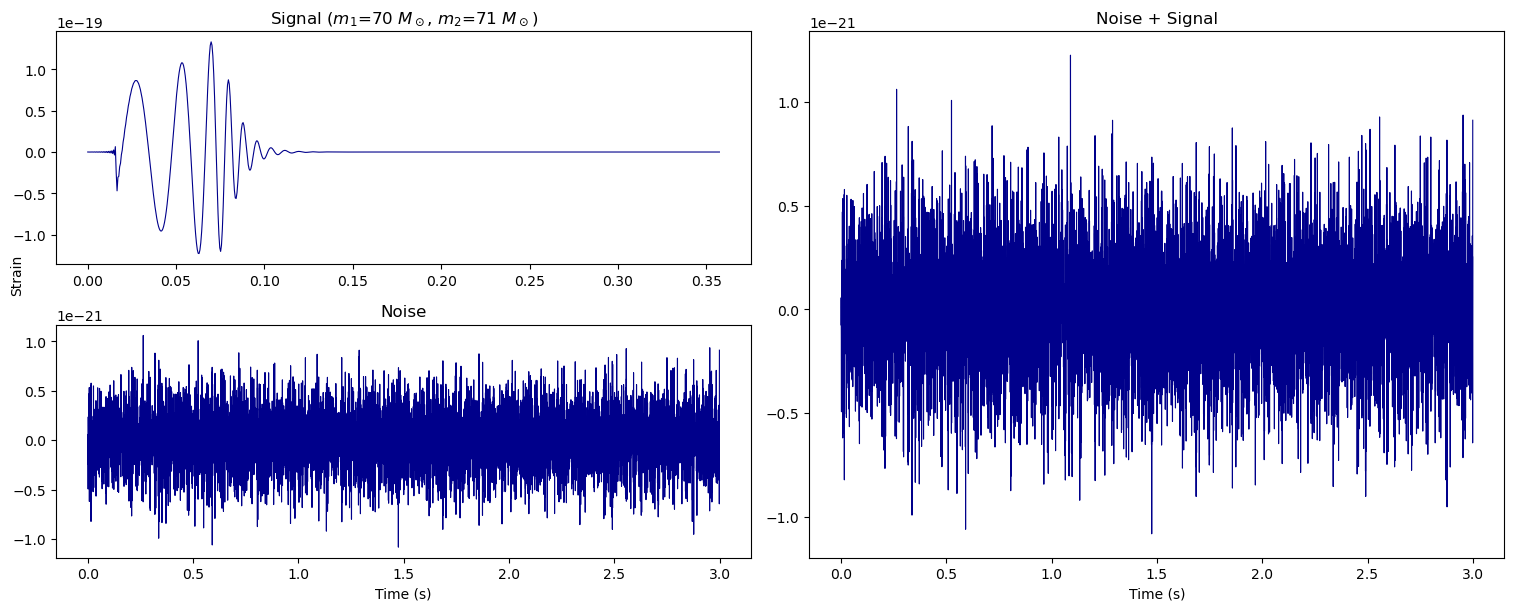

In [15]:
m1 = mass1_tr[0]
m2 = mass2_tr[0]
incl = inclination_tr[0]
dist = np.array(astr_cosm.Planck15.luminosity_distance(distance_red_tr[0]))

ra = ra_tr[0]
dec = dec_tr[0]

hp, hc = template(m1, m2, incl, dist, cut_off)
signal = Virgo_gw(hp, hc, ra, dec)
noise = noise_gen(length, delta_t, AdvV_PSD)

data, _ = injection_by_hand(noise, signal)

fig = plt.figure(figsize=(15, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])   # left-top
ax2 = fig.add_subplot(gs[1, 0])   # left-bottom
ax3 = fig.add_subplot(gs[:, 1])   # right, spans both rows

ax1.set_title(fr'Signal ($m_1$={m1} $M_\odot$, $m_2$={m2} $M_\odot$)')
signal_times = np.array(signal.sample_times) + abs(min(np.array(signal.sample_times)))
ax1.plot(signal_times, signal, c='darkblue', linewidth=0.8)

ax2.set_title('Noise')
ax2.plot(noise.sample_times, noise, c='darkblue', linewidth=0.8)
ax2.set_xlabel('Time (s)')

ax3.set_title('Noise + Signal')
ax3.plot(data.sample_times, data, c='darkblue', linewidth=0.8)

fig.text(0.001, 0.55, 'Strain', va='center', rotation='vertical')
plt.xlabel('Time (s)')

plt.subplots_adjust(hspace=0.4)
plt.show()
plt.close()

The following function call for all previous functions to create a bank of images: by specifying the corresponding parameters and its purpose (train or test), the code will run the required functions to generate a signal, a background noise, inject it, save the records of the injection time and parameters used and save in the corresponding folder if train or test.

In [16]:
def bank_generator(mass1, mass2, inclination, distance, ra, dec, purpose):

    """
    Computes all images for a parameter space
    -----------------------------------------

    Arguments:
    mass1 mass2 -- masses of both compact black holes
    inclination -- angle between angular momentum L and line of sight (from 0 to PI)
    distance -- distance in Mpc to the emitting source
    ra dec -- sky location of the source
    purpose -- 'train' or 'test'

    Return:
    timeseries
    record file in .csv format

    """
    # starts the records file
    file = ['Ref.Name',  'Mass 1', 'Mass 2', 'Chirp mass', 'Mass ratio', 'SNR', 'Distance(z)',  'Inclination (pi units)',  'MergerTime(sec)',  'Ra',  'Dec']

    # according to the purpose (train or test) we specificy the path to save the images
    if purpose == 'train':
        dir_name = training_signal_dir

    elif purpose == 'test':
        dir_name = test_signal_dir

    else:
        raise ValueError('Purpose must be train or test')
    
    for M1 in tqdm(mass1):
        
        for M2 in (mass2):

            it = 1 # keep the record of number of sample inside a collection of images for masses M1 and M2

            for inc in inclination:
                for di in distance:
                    for i in range(len(ra)):
                        
                        # convert redshift distances to Mpc destances
                        dist = np.array(astr_cosm.Planck15.luminosity_distance(np.array(di))) # convertion to Mpc with Planck15 cosmology

                        # generate GW signal, background noise, projected signal and injected signal
                        hp, hc = template(M1, M2, inc * np.pi, dist, cut_off) # GW wave emitted by source
                        strain = noise_gen(length, delta_t, AdvV_PSD) # noise simulated from detector

                        gw_signal = Virgo_gw(hp, hc, ra[i], dec[i]) # GW projection as measured by detector
                                   
                        candidate, sig_loc = injection_by_hand(strain, gw_signal) # injection of the measured GW waveform

                        ####################   generate temporal series   ###################
                        candidate.save(dir_name + '/mass1-{}_mass2-{}_sample{}.hdf'.format(M1, M2, it))
                        ######################################################################

                        snr_value = SNR(gw_signal, strain)

                        # compute chirp mass and mass ratio
                        chirp_m = chirp(M1,M2)
                        Mass_rat = q(M1,M2)

                        dic = {'mass 1':M1, 'mass2':M2, 'Chirp mass':chirp_m, 'Mass ratio':Mass_rat, 'SNR':snr_value, 'distance (z)':di, 'inclination':inc, 'merger time (sec)':sig_loc, 'ra':ra[i], 'dec':dec[i]}

                        ###################################################################
                        file_aux = []
                        file_aux.append('mass1-{}_mass2-{}_sample{}'.format(M1, M2, it))
                        for j in dic.values():
                            file_aux.append(j)
                        file = np.vstack((file,file_aux))
                        #####################################################################


                        it += 1

    return file

The former function was used to create signal images. This one is used to create noise images. Just calls the noise generator and specifies the save folder through the purpose specification.

In [17]:
def just_noise(N, purpose):

    """
    This function generates N timeseries of noise
    ---------------------------------------------------------------

    Arguments:
    N -- number of images generated
    purpose -- train or test

    """

    # again we specify the path to save images
    if purpose == 'train':
        dir_name = training_noise_dir

    elif purpose == 'test':
        dir_name = test_noise_dir

    else:
        raise ValueError('Purpose must be train or test')

    it = 1 # keeps the count for the number of samples
    for i in tqdm(range(N)):
        strain = noise_gen(length, delta_t, AdvV_PSD) # noise simulated from detector

        #############   generate temporal series    ###############
        strain.save(dir_name + '/noise_sample{}.hdf'.format(it))
        ###########################################################
        
        it += 1
    
    return

Following cells calls for all previous functions to create the images and save them in the corresponding folders. First we created the training images by calling bank_generator function to create signal images and then just_noise to create noise images. All this by using the training parameters defined at the very first lines of code. After creating all images, it creates a .csv file containing the records for signal images, including its parameters and injection time.

Same for test images.

Before creating them, the code will print a validation statement where prints number of images to create and a required confirmation to go ahead with the process. Both validations for training and test sets are required.

In [18]:
# cell to run code for template bank generator. Need to confirm.
####################################################################################################################
#################################################  TRAIN  ##########################################################
####################################################################################################################


num = len(inclination_tr) * len(distance_red_tr) * len(ra_tr) * len(mass1_tr) * len(mass2_tr) # number of time series
print('Se generarán ',num,' TRAINING time series de señal GW. También se generará el mismo número de time series de ruido.')

if mode == 'n':
    decision = str(input('Quieres seguir con el proceso? [y/n]: '))

if decision == 'y':
    rec = bank_generator(mass1_tr, mass2_tr, inclination_tr, distance_red_tr, ra_tr, dec_tr, purpose='train')
    df = pd.DataFrame(rec)
    df.columns = ['Ref.Name',  'Mass 1', 'Mass 2', 'Chirp mass', 'Mass ratio', 'SNR', 'Distance(z)',  'Inclination (pi units)',  'MergerTime(sec)',  'Ra',  'Dec']
    df.to_csv(training_dir + '/Records_training_signal.csv', sep='\t', float_format='%.4f', header=False, index=False)

    just_noise(num, purpose = 'train')

elif decision == 'n':
    print('Proccess aborted')


####################################################################################################################
#################################################  TEST  ###########################################################
####################################################################################################################

num = len(inclination_te) * len(distance_red_te) * len(ra_te) * len(mass1_te) * len(mass2_te) # number of images
print('Se generarán ',num,' TEST time series de señal GW. También se generará el mismo número de time series de ruido.')

if mode == 'n':
    decision = str(input('Quieres seguir con el proceso? [y/n]: '))

if decision == 'y':
    rec = bank_generator(mass1_te, mass2_te, inclination_te, distance_red_te, ra_te, dec_te, purpose='test')
    df = pd.DataFrame(rec)
    df.columns = ['Ref.Name',  'Mass 1', 'Mass 2', 'Chirp mass', 'Mass ratio', 'SNR', 'Distance(z)',  'Inclination (pi units)',  'MergerTime(sec)',  'Ra',  'Dec']
    df.to_csv(test_dir + '/Records_test_signal.csv', sep='\t', float_format='%.4f', header=False, index=False)

    just_noise(num, purpose = 'test')

elif decision == 'n':
    print('Proccess aborted')

Se generarán  7260  TRAINING time series de señal GW. También se generará el mismo número de time series de ruido.


100%|██████████| 7260/7260 [23:20<00:00,  5.19it/s]


Se generarán  1296  TEST time series de señal GW. También se generará el mismo número de time series de ruido.


100%|██████████| 1296/1296 [04:12<00:00,  5.13it/s]


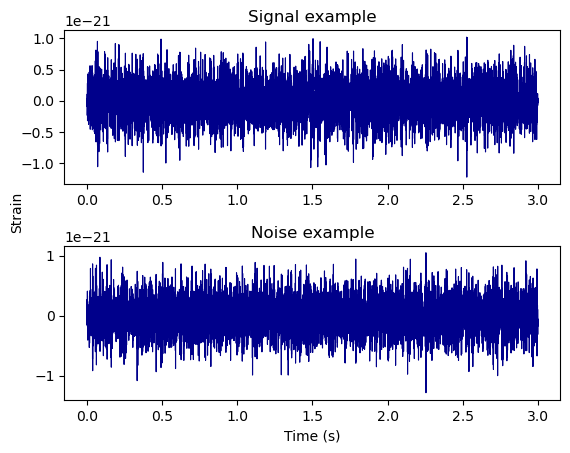

In [4]:
signal_name = 'mass1-70_mass2-71_sample1.hdf'
noise_name = 'noise_sample1.hdf'

signal = pycbcty.timeseries.load_timeseries(os.path.join(training_signal_dir, signal_name))
noise = pycbcty.timeseries.load_timeseries(os.path.join(training_noise_dir, noise_name))

fig, axs = plt.subplots(2)

axs[0].set_title('Signal example')
axs[0].plot(signal.sample_times, signal, c='darkblue', linewidth=0.8)

axs[1].set_title('Noise example')
axs[1].plot(noise.sample_times, noise, c='darkblue', linewidth=0.8)

fig.text(0.04, 0.50, 'Strain', va='center', rotation='vertical')
plt.xlabel('Time (s)')

plt.subplots_adjust(hspace=0.4)
plt.show()
plt.close()

To end the code, we compress the folder containing all subfolders and images in a .zip file and remove the original folder (not zip) to avoid duplicates.

In [4]:
# creates a zip file containin all images and records, and them removes the directory where images where originally stored, to avoid duplicates
sh.make_archive(base_dir,'zip',root_dir,file_name)
sh.rmtree(base_dir)

Enlaces de interés:

https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/group___l_a_l_sim_noise_p_s_d__c.html

http://pycbc.org/pycbc/latest/html/pycbc.psd.html

http://pycbc.org/pycbc/latest/html/pycbc.noise.html

http://pycbc.org/pycbc/latest/html/pycbc.html#pycbc.detector.Detector

http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform

https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/group___l_a_l_sim_noise_p_s_d__c.html
